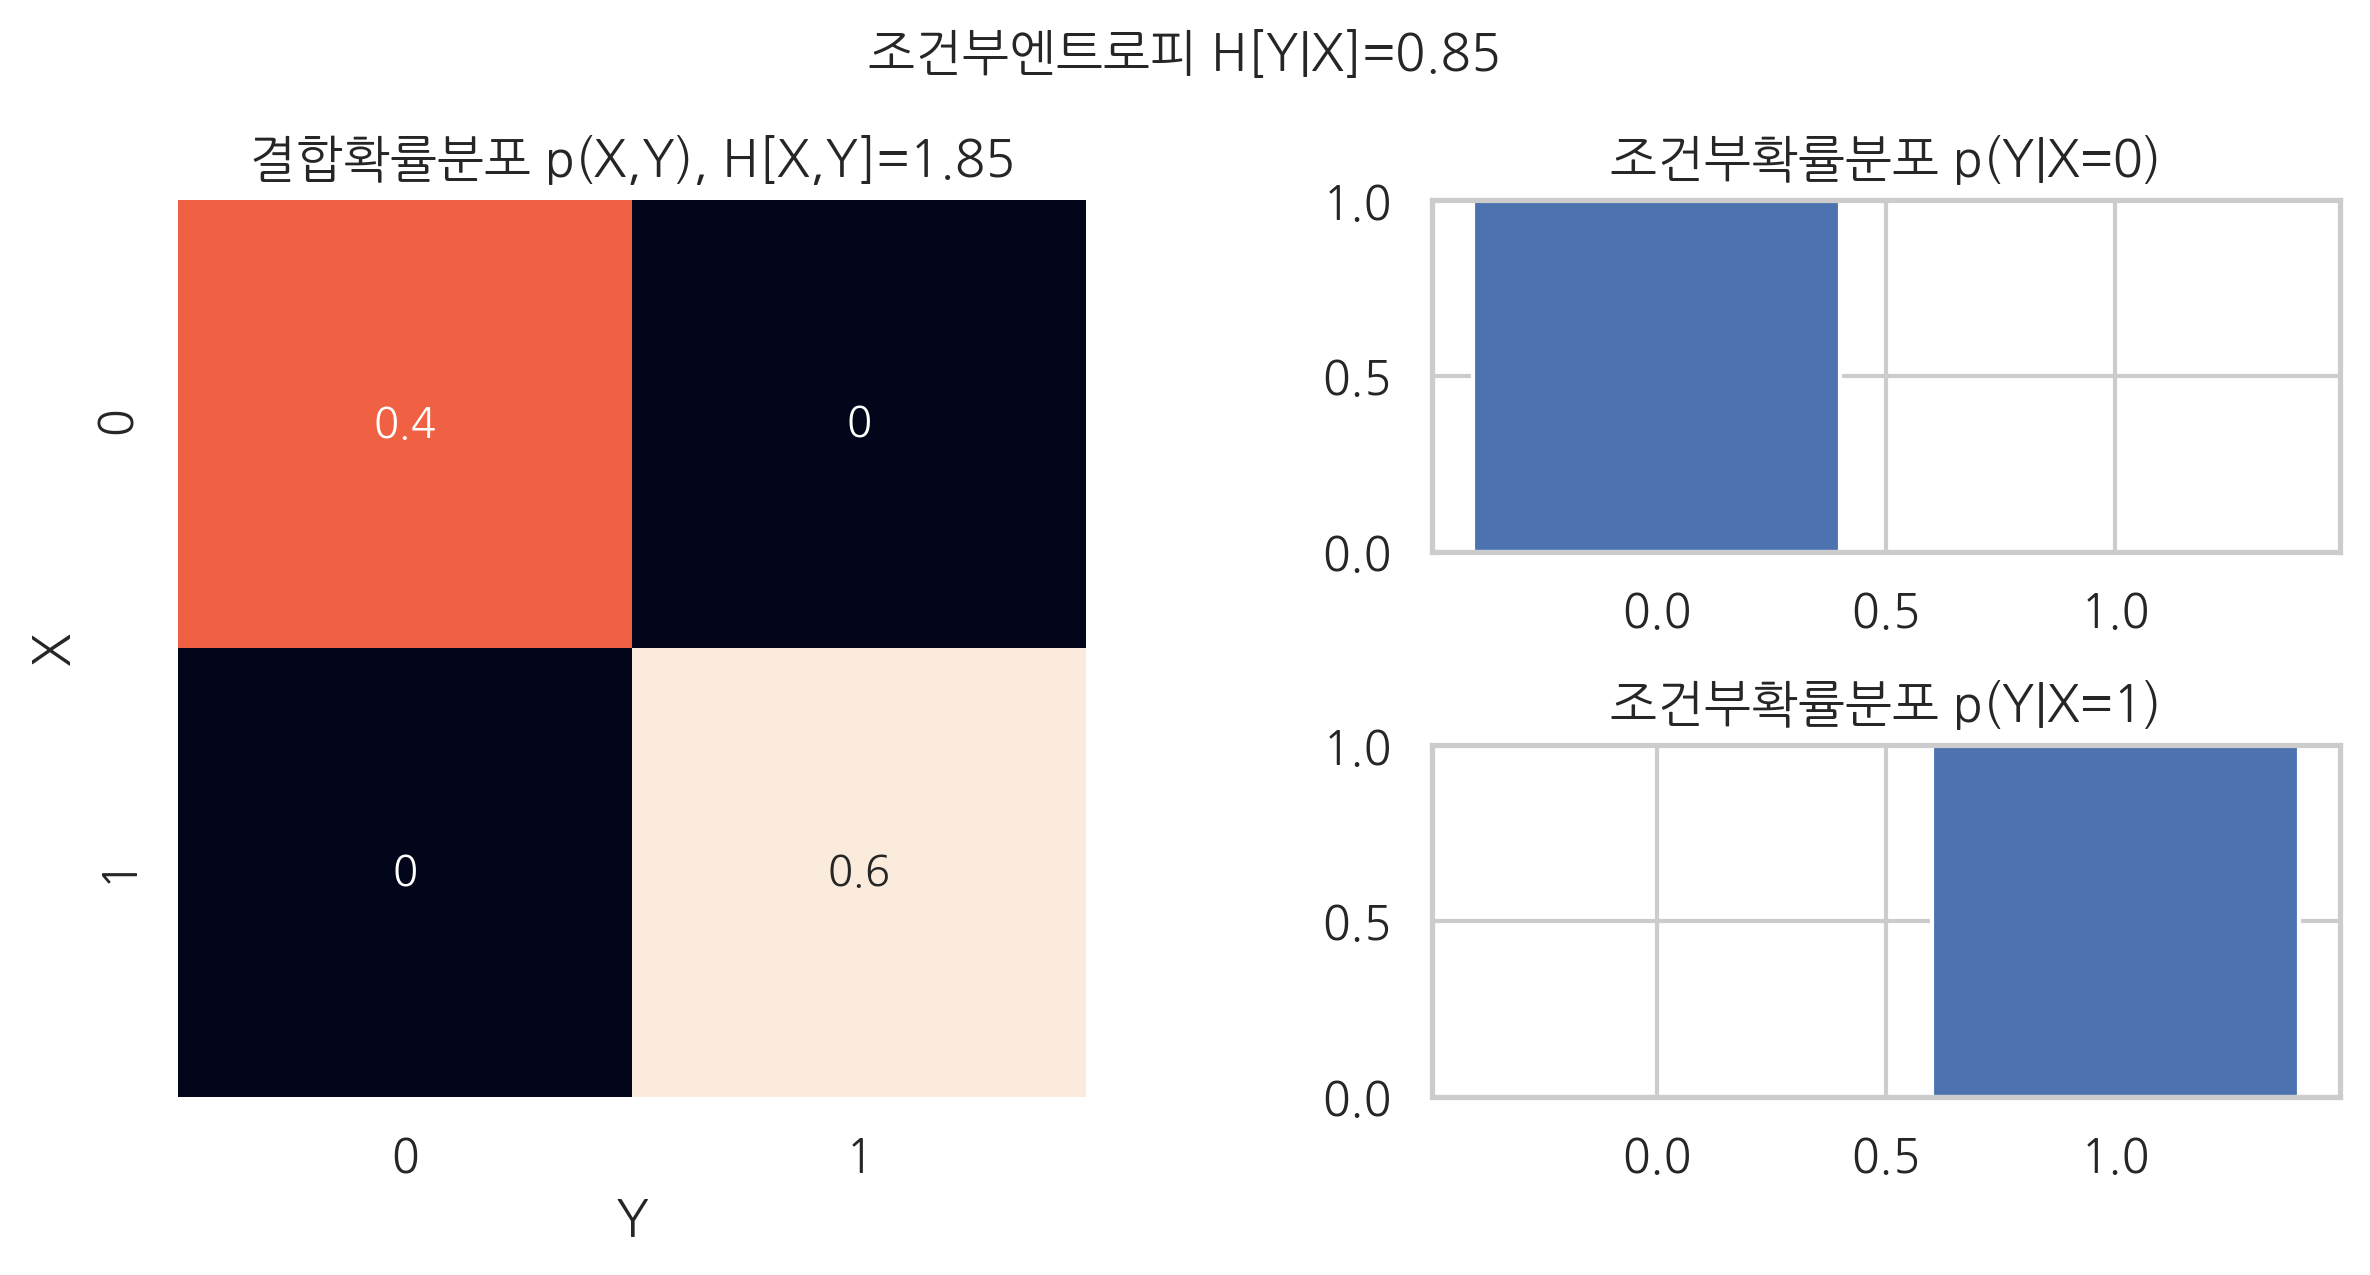

In [1]:
plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
pXY = [[0.4, 0], [0, 0.6]]
sns.heatmap(pXY, annot=True, cbar=False)
plt.xlabel("Y")
plt.ylabel("X")
plt.title("결합확률분포 p(X,Y), H[X,Y]=1.85")

plt.subplot(222)
plt.bar([0, 1], [1, 0])
plt.ylim(0, 1)
plt.title("조건부확률분포 p(Y|X=0)")

plt.subplot(224)
plt.bar([0, 1], [0, 1])
plt.ylim(0, 1)
plt.title("조건부확률분포 p(Y|X=1)")

plt.tight_layout(w_pad=5)
plt.suptitle("조건부엔트로피 H[Y|X]=0.85", y=1.05)
plt.show()

In [2]:
sp.stats.entropy([1/3, 2/3], base=2)

0.9182958340544894

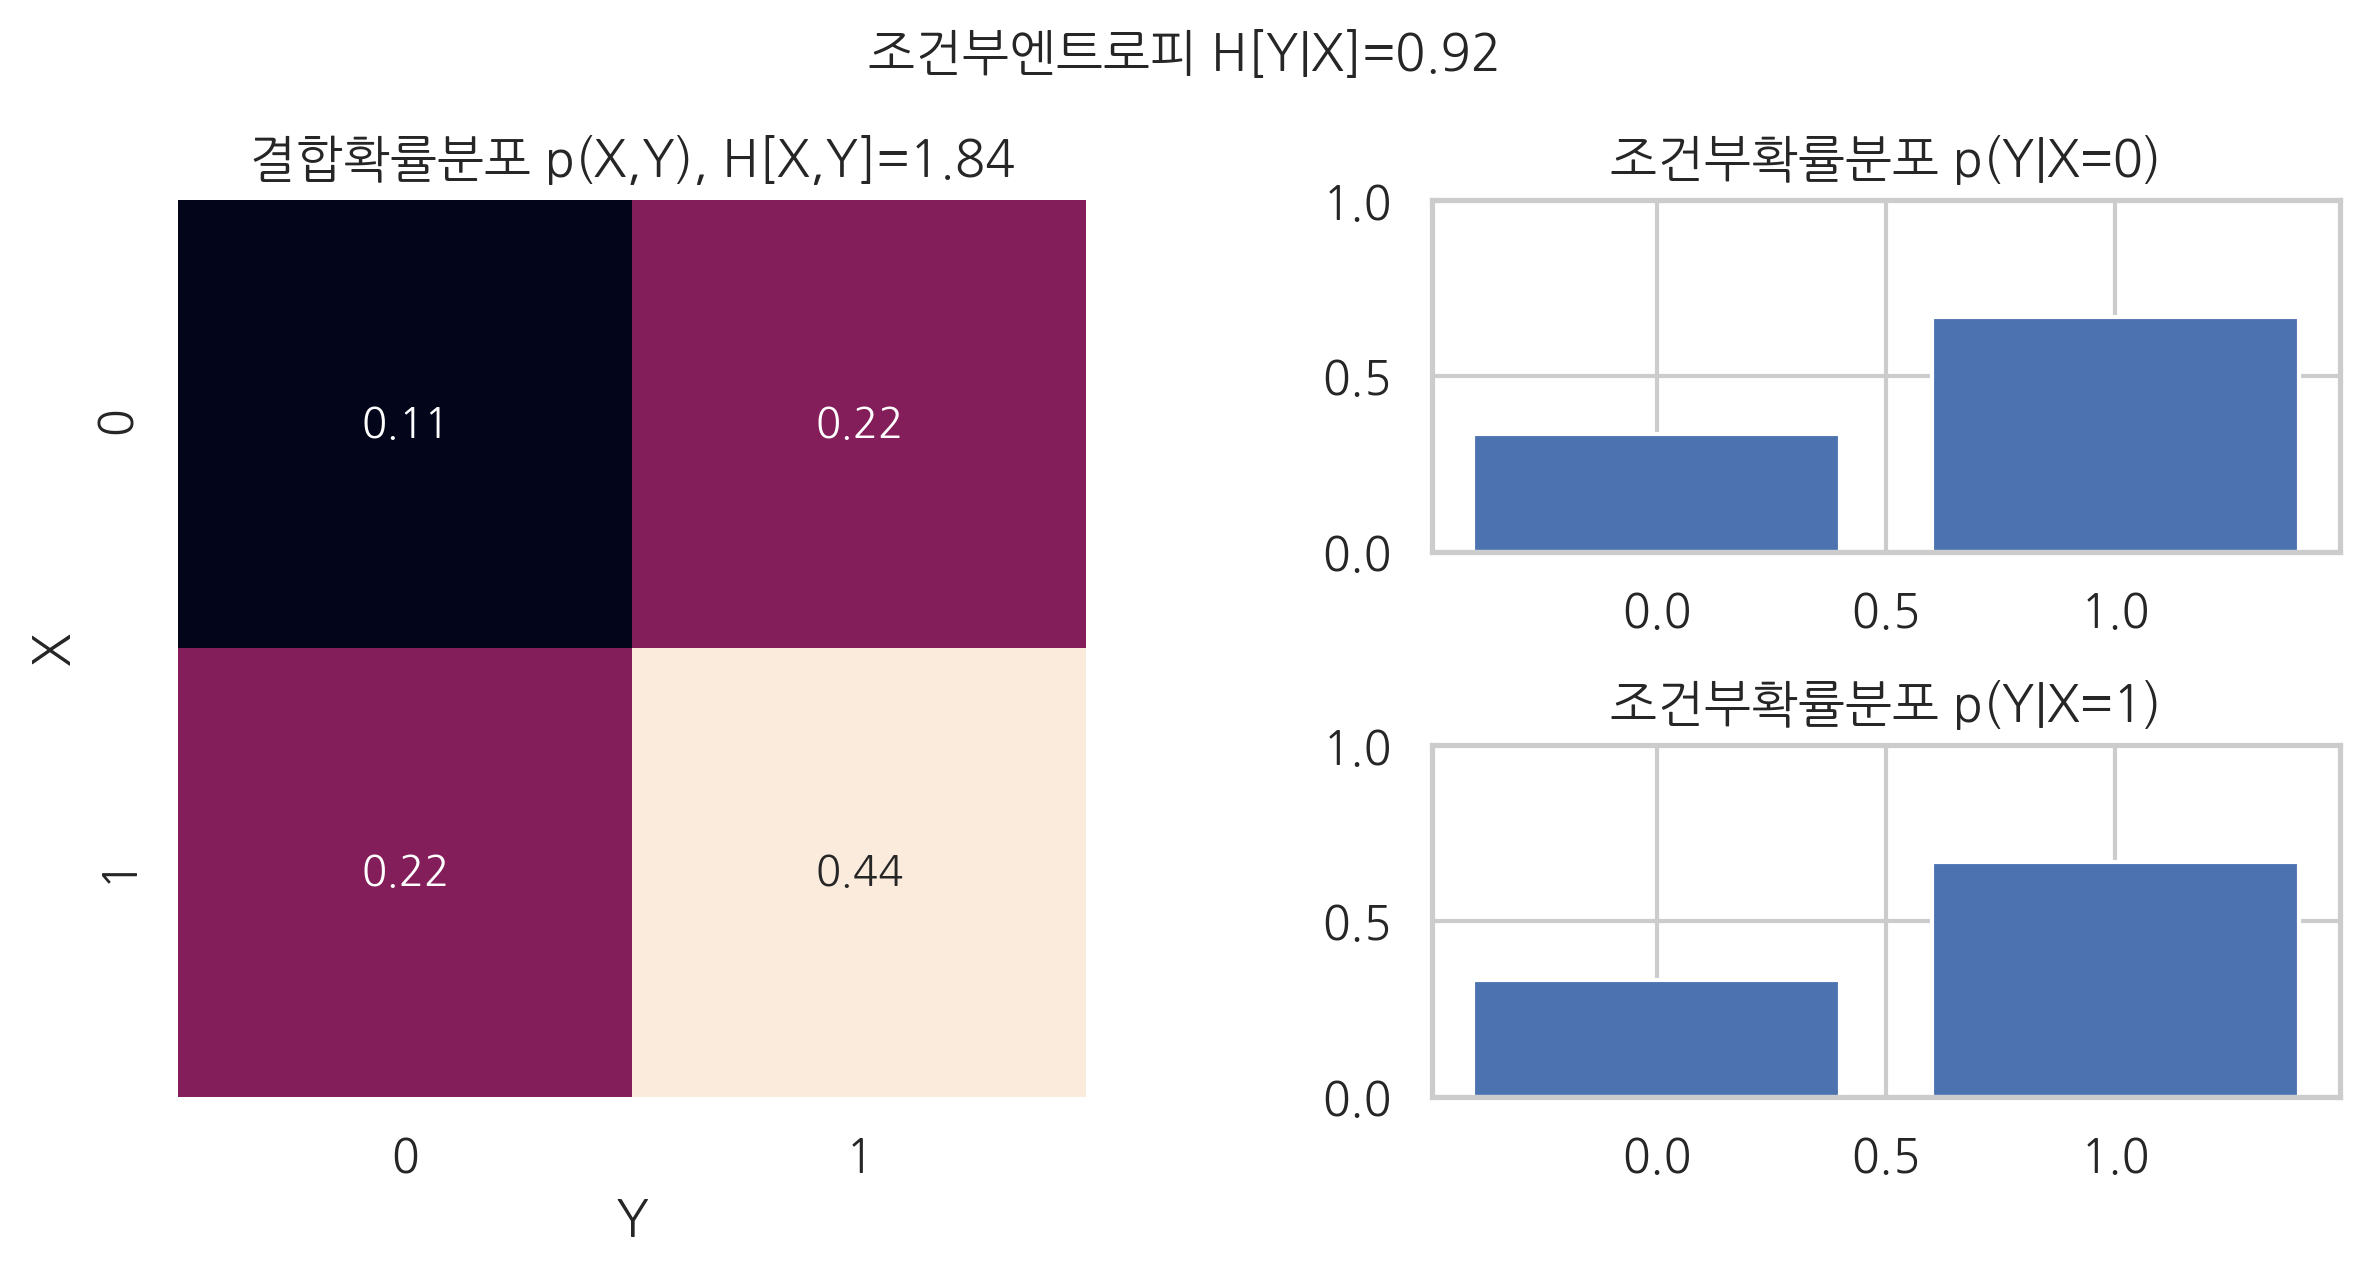

In [3]:
plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
pXY = [[1/9, 2/9], [2/9, 4/9]]
sns.heatmap(pXY, annot=True, cbar=False)
plt.xlabel("Y")
plt.ylabel("X")
plt.title("결합확률분포 p(X,Y), H[X,Y]=1.84")

plt.subplot(222)
plt.bar([0, 1], [1/3, 2/3])
plt.ylim(0, 1)
plt.title("조건부확률분포 p(Y|X=0)")

plt.subplot(224)
plt.bar([0, 1], [1/3, 2/3])
plt.ylim(0, 1)
plt.title("조건부확률분포 p(Y|X=1)")

plt.tight_layout(w_pad=5)
plt.suptitle("조건부엔트로피 H[Y|X]=0.92", y=1.05)
plt.show()

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [1, 2])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = iris.target[idx]
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
95,6.7,3.0,5.2,2.3,2
96,6.3,2.5,5.0,1.9,2
97,6.5,3.0,5.2,2.0,2
98,6.2,3.4,5.4,2.3,2
99,5.9,3.0,5.1,1.8,2


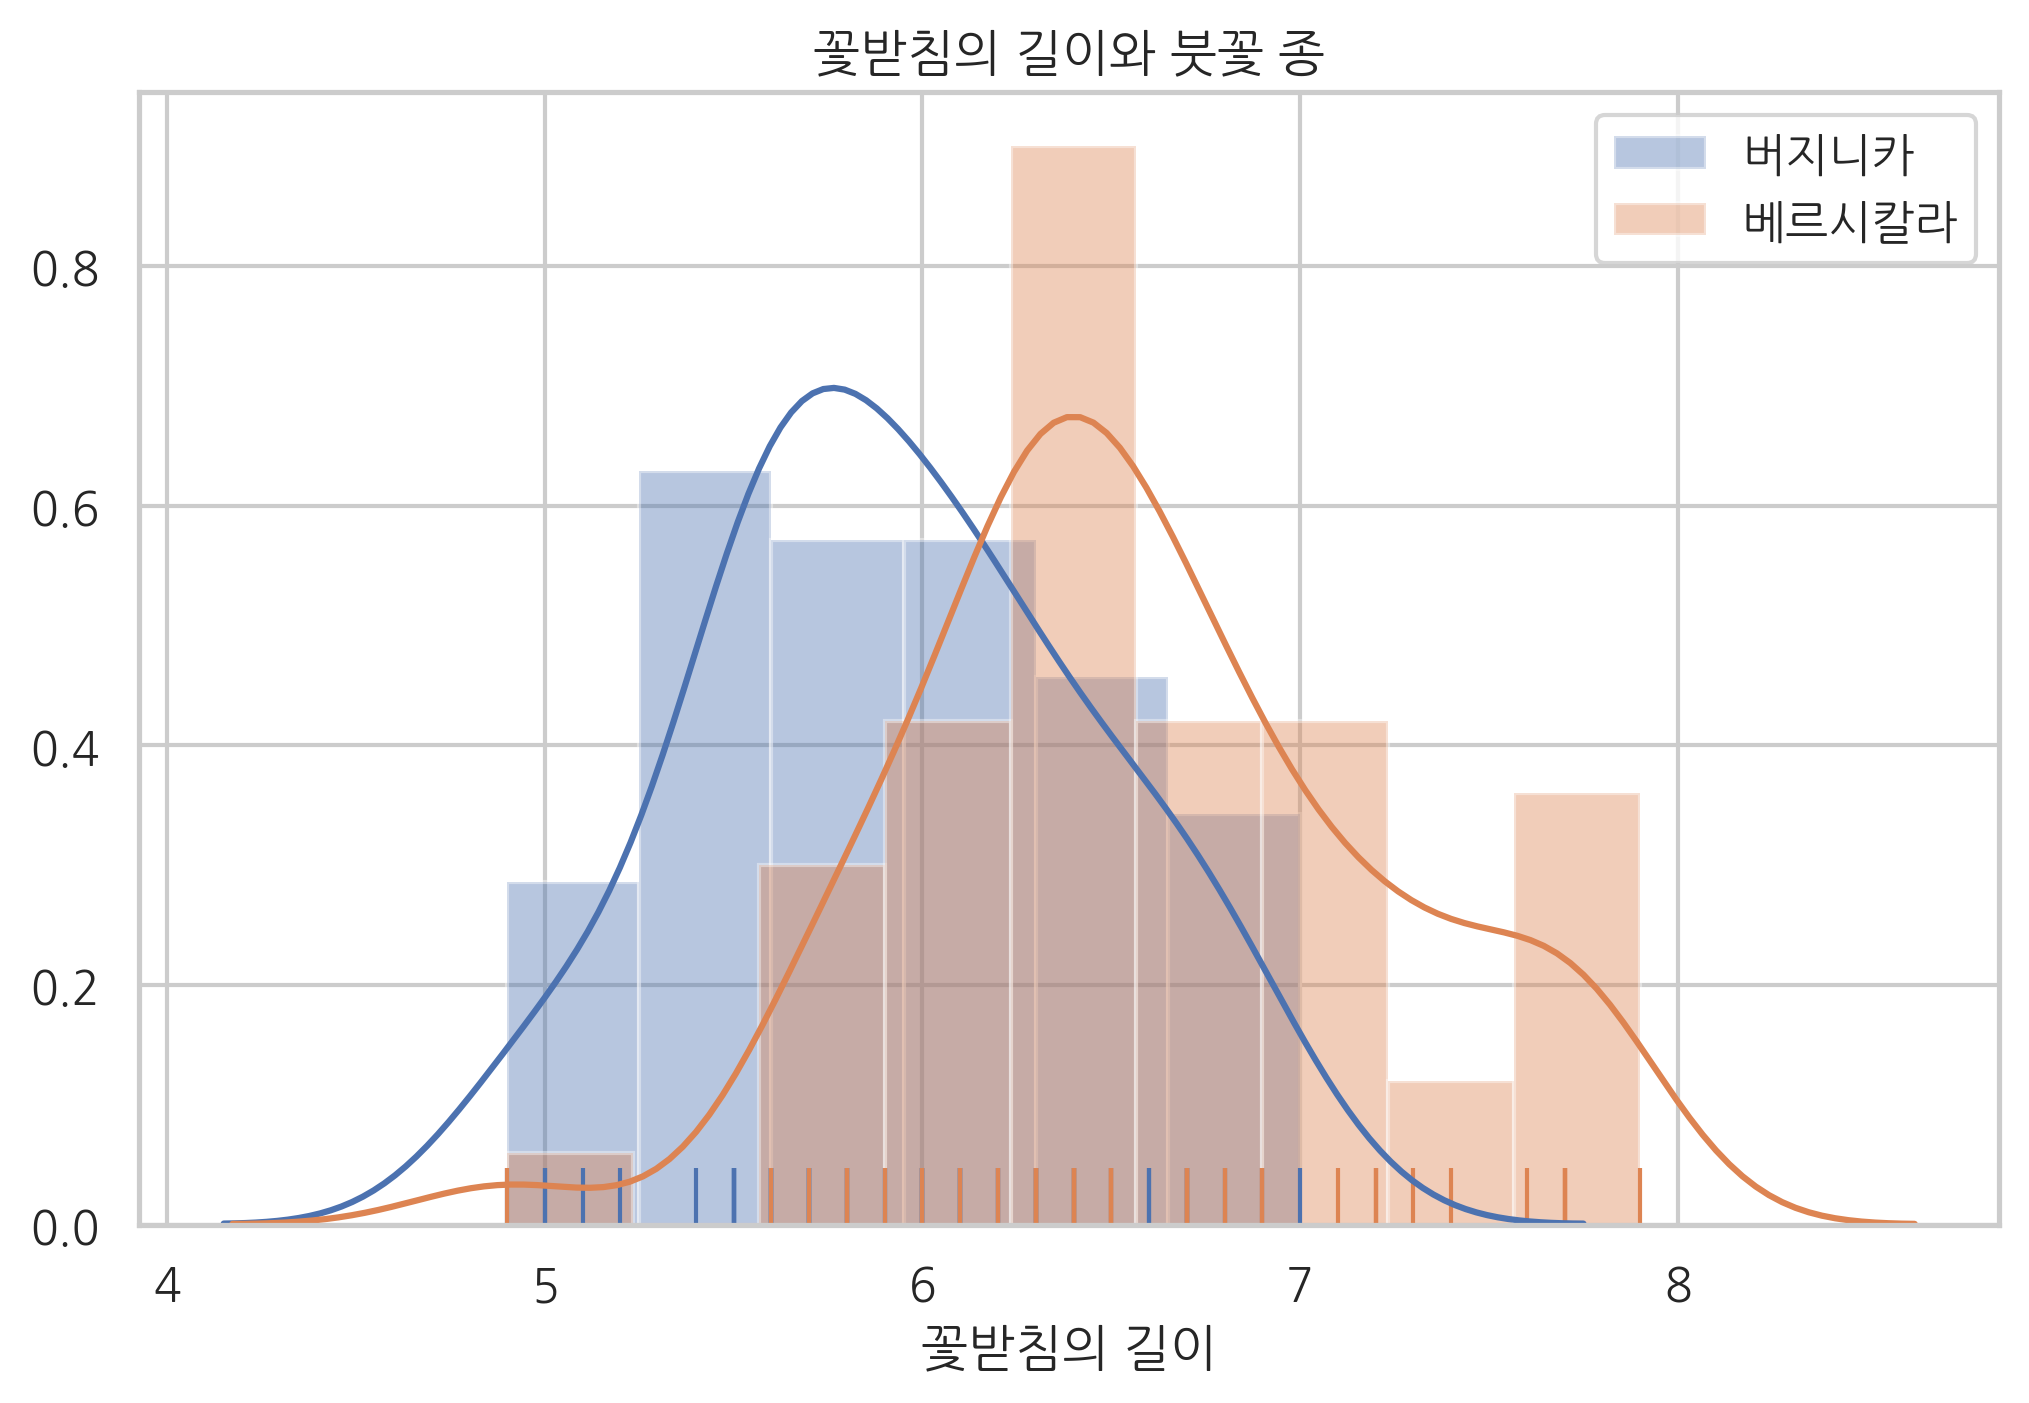

In [5]:
sns.distplot(df[df.species == 1]["sepal length (cm)"], hist=True, rug=True, label="버지니카")
sns.distplot(df[df.species == 2]["sepal length (cm)"], hist=True, rug=True, label="베르시칼라")
plt.legend()
plt.xlabel("꽃받침의 길이")
plt.title("꽃받침의 길이와 붓꽃 종")
plt.show()

In [6]:
df["X1"] = df["sepal length (cm)"] > 6
pivot_table1 = df.groupby(["X1", "species"]).size().unstack().fillna(0)
pivot_table1

species,1,2
X1,,
False,30,9
True,20,41


In [7]:
def cond_entropy(v):
    eps = np.finfo("float").eps
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)
    return HYX

cond_entropy(pivot_table1.values)

0.860714271586387

In [8]:
df["X2"] = df["sepal length (cm)"] > 6.5
pivot_table2 = df.groupby(["X2", "species"]).size().unstack()
pivot_table2

species,1,2
X2,,
False,42,28
True,8,22


In [9]:
cond_entropy(pivot_table2.values)

0.9306576387006182

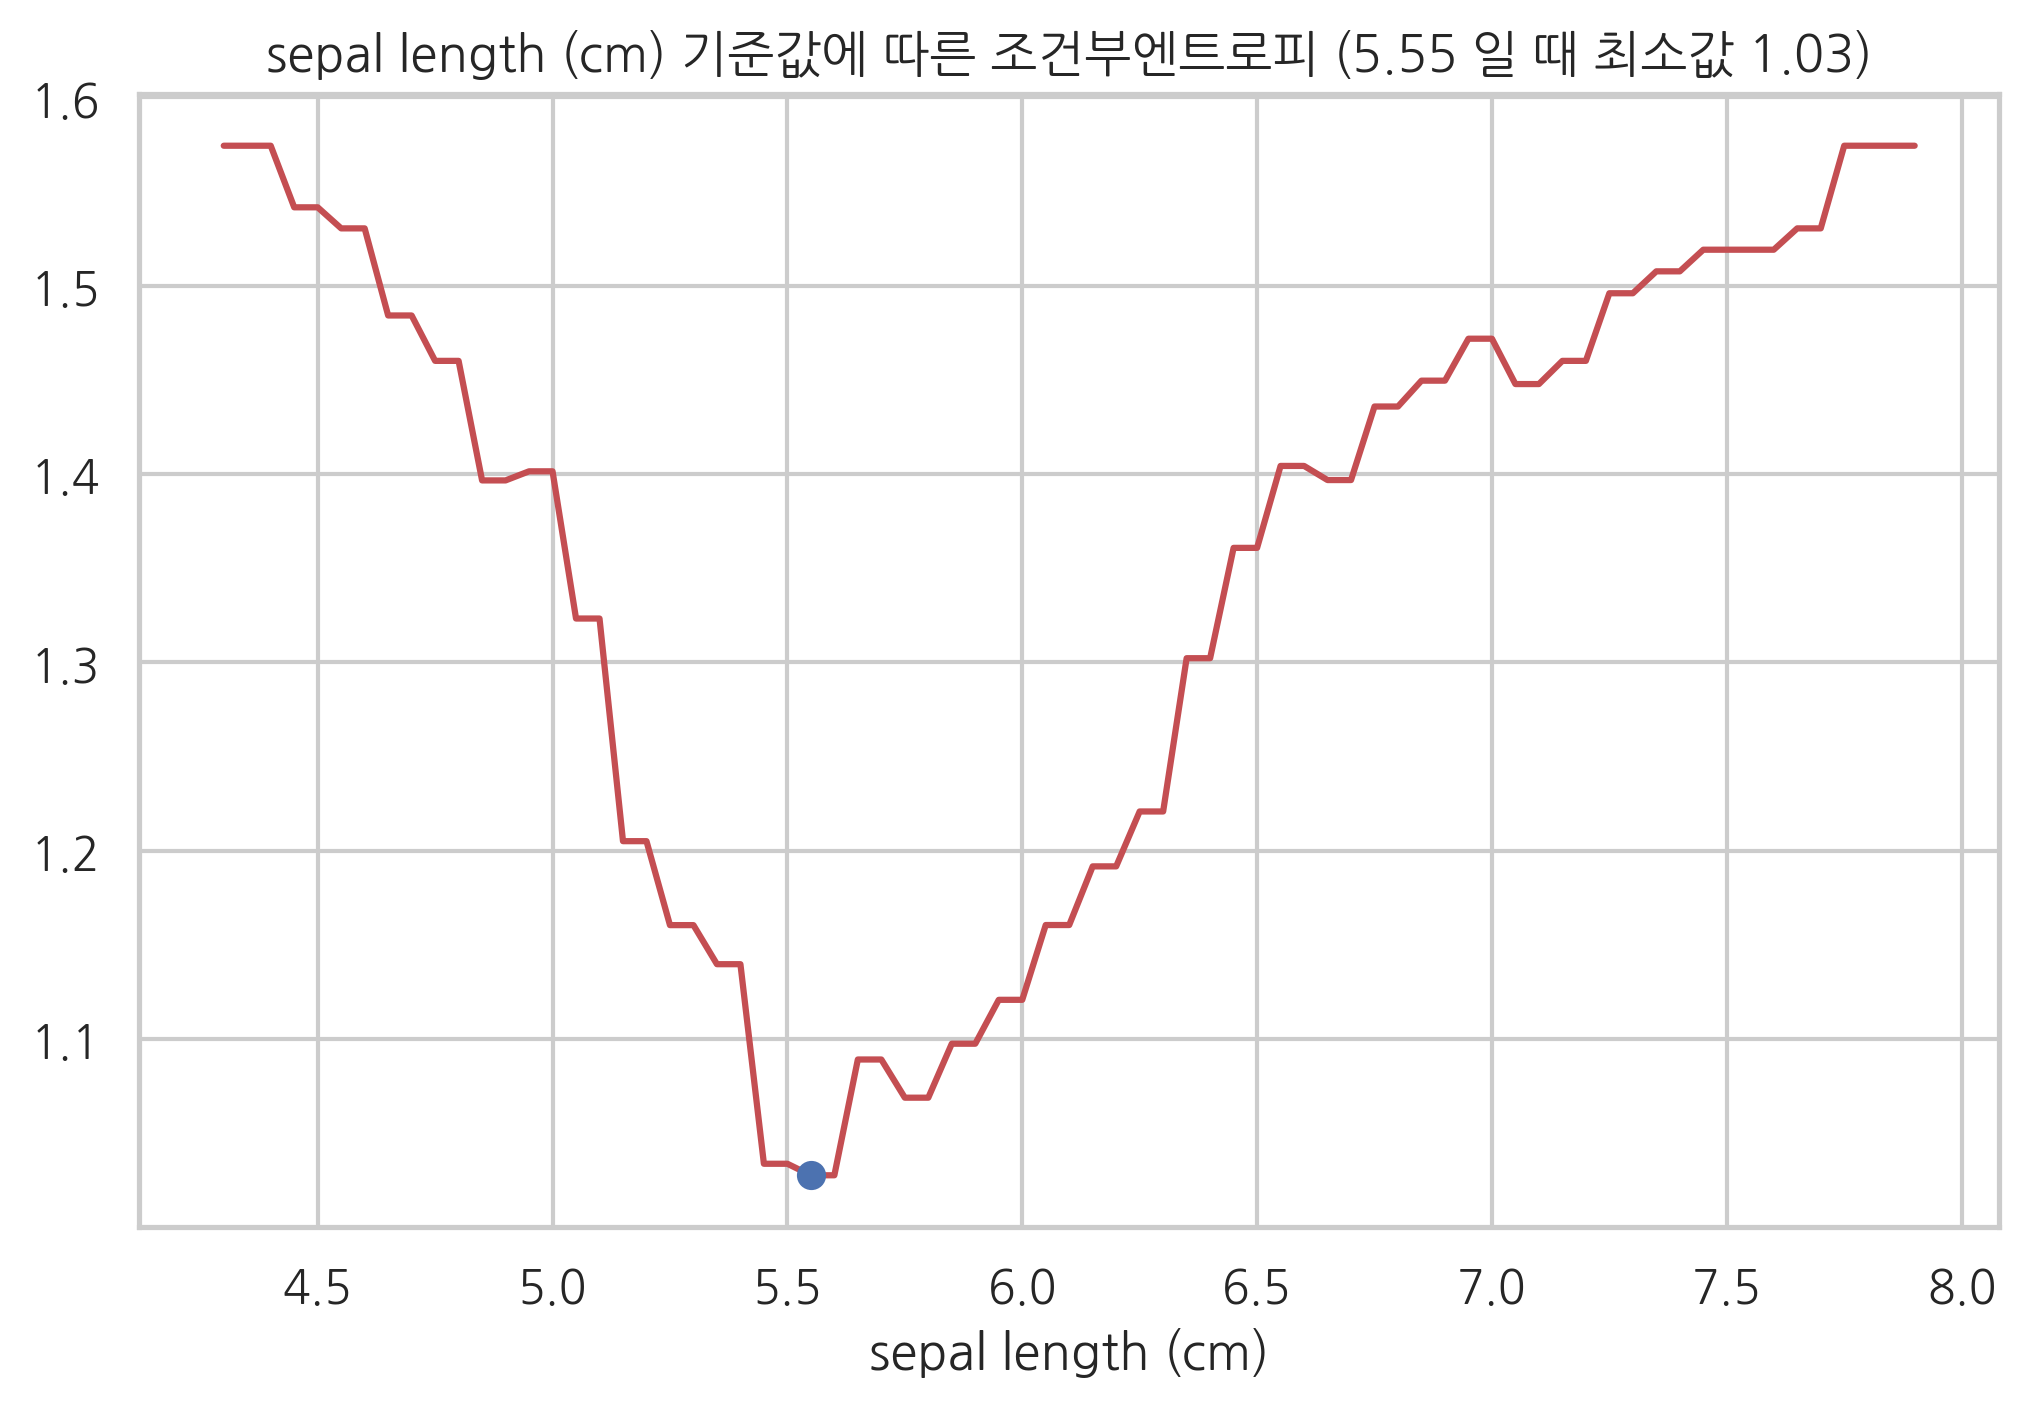

In [10]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = iris.target

def calc_cond_entropies(col, threshold):
    df['X1'] = df[col] > threshold
    pivot_table1 = df.groupby(['X1', 'species']).size().unstack().fillna(0)
    v = pivot_table1.values
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)
    return HYX

def plot_min_cond_entropy(col):
    th_min = df[col].min()
    th_max = df[col].max()
    th_range = np.arange(th_min, th_max + 0.05, 0.05)
    cond_entropies = []
    for th in th_range:
        cond_entropies.append(calc_cond_entropies(col, th))
    id_min = np.argmin(cond_entropies)
    th_min = th_range[id_min]
    ce_min = np.min(cond_entropies)
    
    plt.plot(th_range, cond_entropies, 'r-')
    plt.plot(th_min, ce_min, 'bo')
    title = '{} 기준값에 따른 조건부엔트로피 ({:.3} 일 때 최소값 {:.3})'.format(col, th_min, ce_min)
    plt.title(title)
    plt.xlabel(col)
    plt.show()
    
plot_min_cond_entropy('sepal length (cm)')

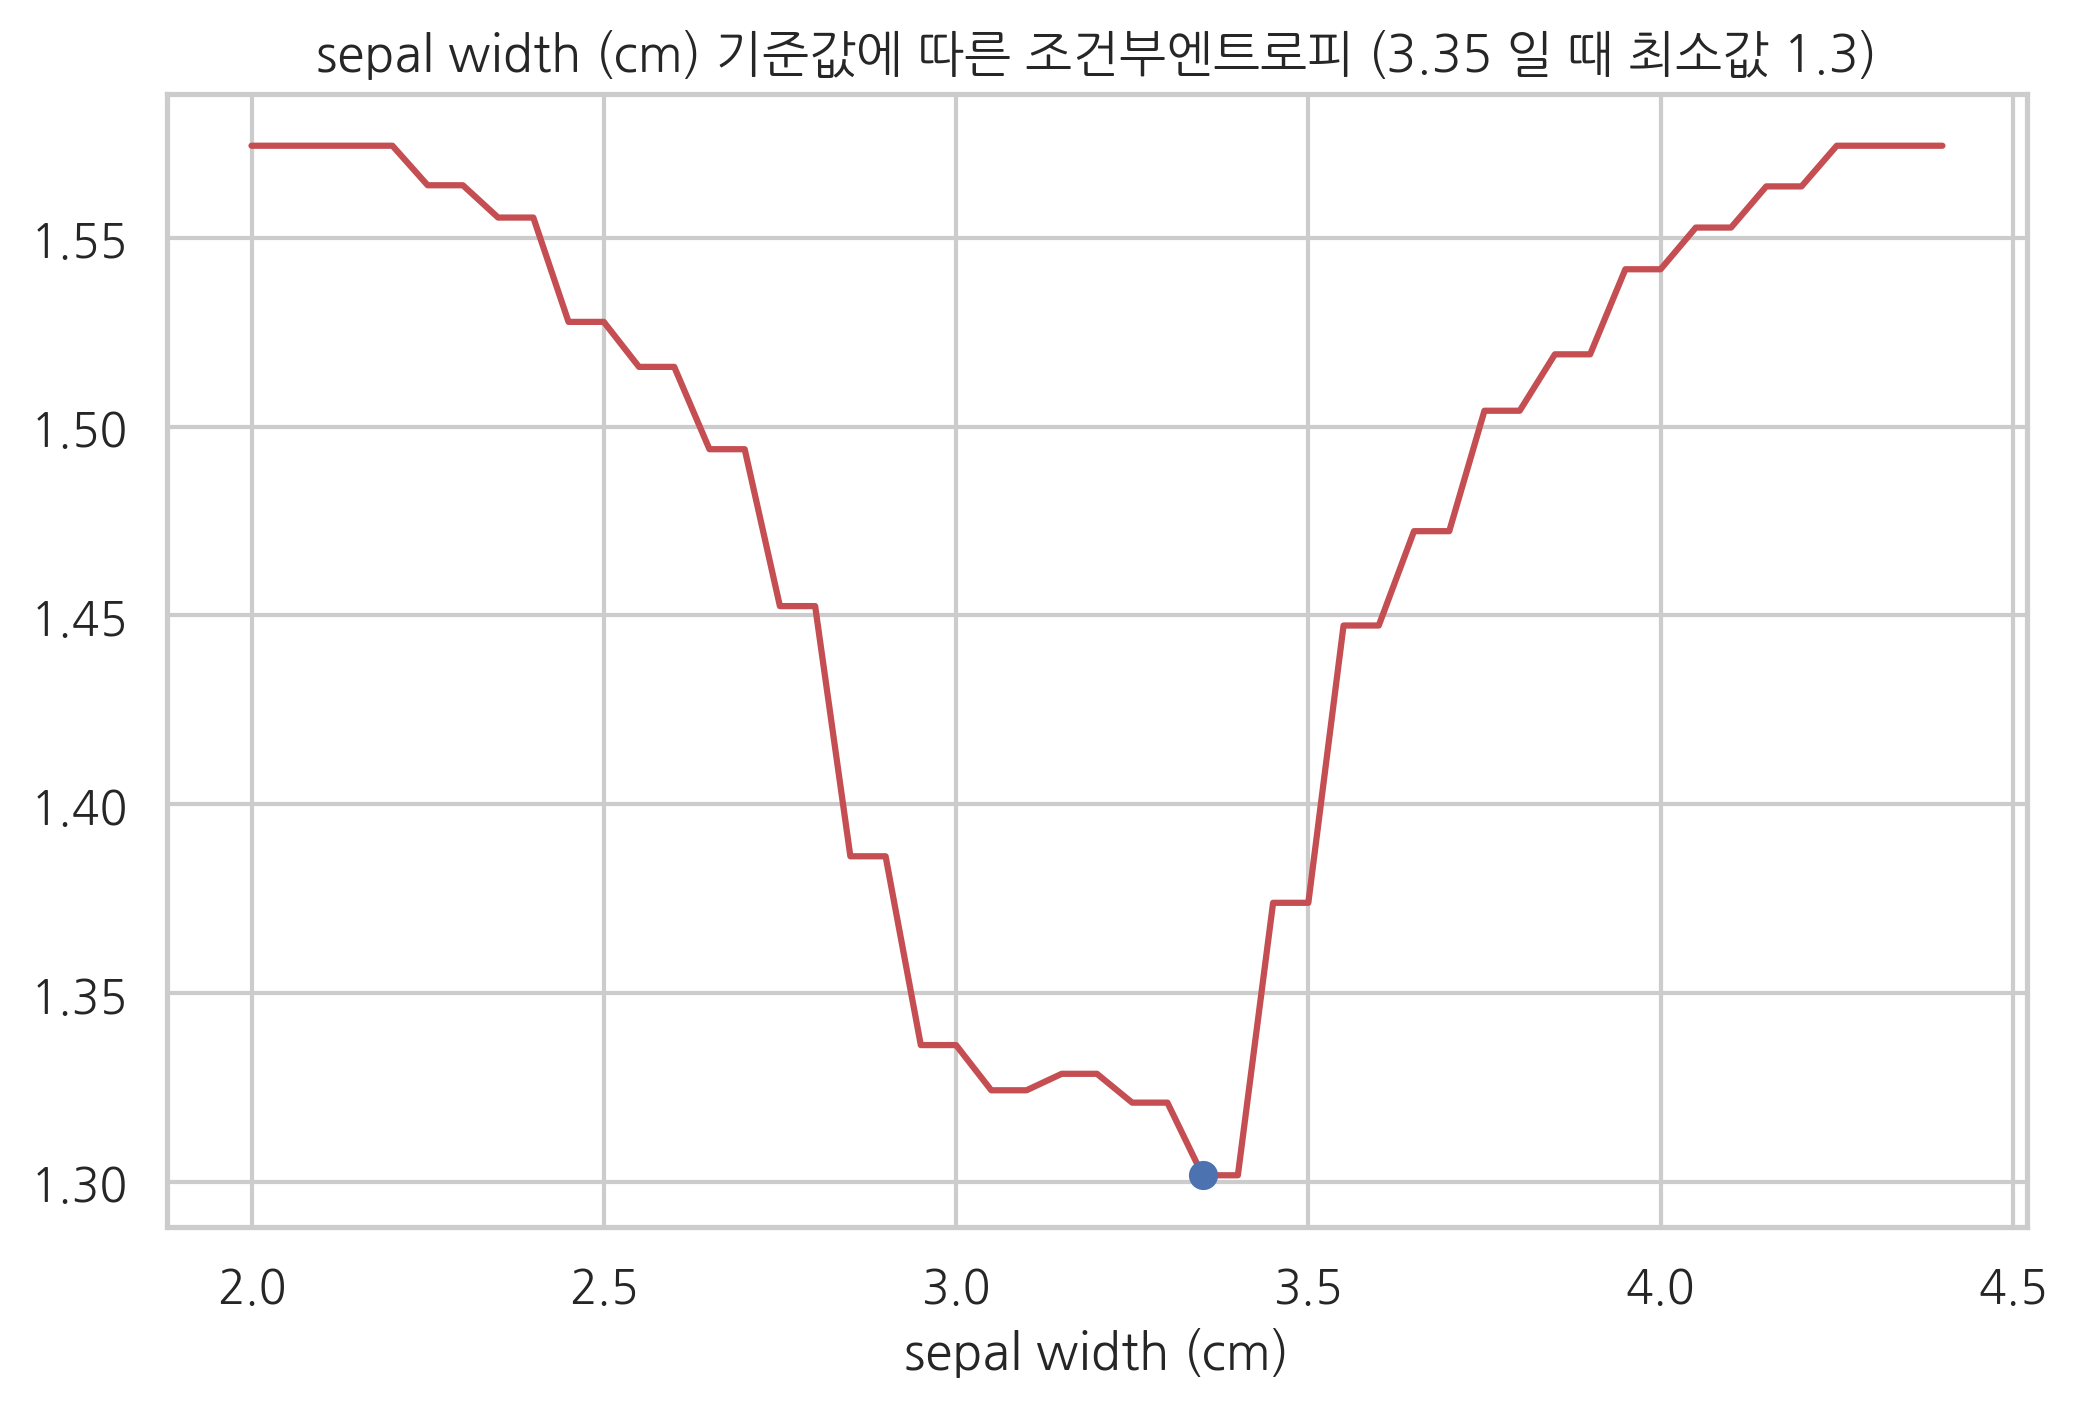

In [11]:
plot_min_cond_entropy('sepal width (cm)')